# Clustering (K-Means, Spectral Clustering, DBSCAN)
[SKLearn: Clustering](https://scikit-learn.org/stable/modules/clustering.html)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.cluster as clu
from sklearn import preprocessing
from sklearn import metrics

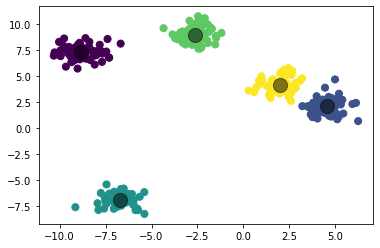

In [2]:
from sklearn.datasets.samples_generator import make_blobs

N_CLUSTERS = 5
X, y_true = make_blobs(n_samples=300, centers=N_CLUSTERS, cluster_std=0.70, random_state=42)

kmeans = clu.KMeans(n_clusters=N_CLUSTERS).fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Caveats of K-Means

1. The globally optimal result may not be achieved
2. k-means can be slow for large numbers of samples
3. The number of clusters must be selected beforehand
4. k-means is limited to linear cluster boundaries

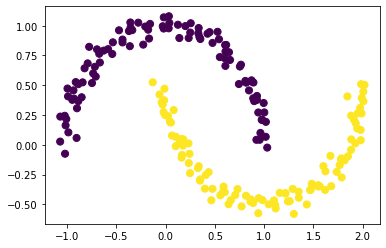

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

#labels = clu.KMeans(2, random_state=0).fit_predict(X)
labels = clu.SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit_predict(X)
#labels = clu.DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

# Image compression

In [4]:
from sklearn.datasets import load_sample_image
pic = load_sample_image("china.jpg") # china.jpg, flower.jpg
# scale and rephape from (427, 640, 3) to (273280, 3)
data = pic / 255.0
data = data.reshape(427 * 640, 3)
# show pic
#ax = plt.axes(xticks=[], yticks=[])
#ax.imshow(pic);

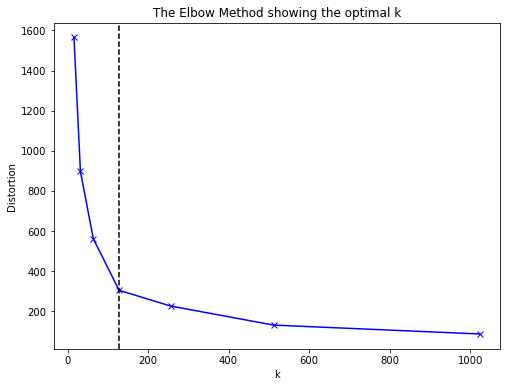

In [5]:
# The Elbow method for cluster number selection
distortions = []
K = [16,32,64,128,256,512,1024]
for k in K:
    kmeanModel = clu.MiniBatchKMeans(n_clusters=k).fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.axvline(x=128, linestyle='dashed', color='black')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [6]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

# the elbow is at 128 clusters
N_CLUSTERS = 128
model = clu.MiniBatchKMeans(N_CLUSTERS).fit(data)
new_colors = model.cluster_centers_[model.predict(data)]

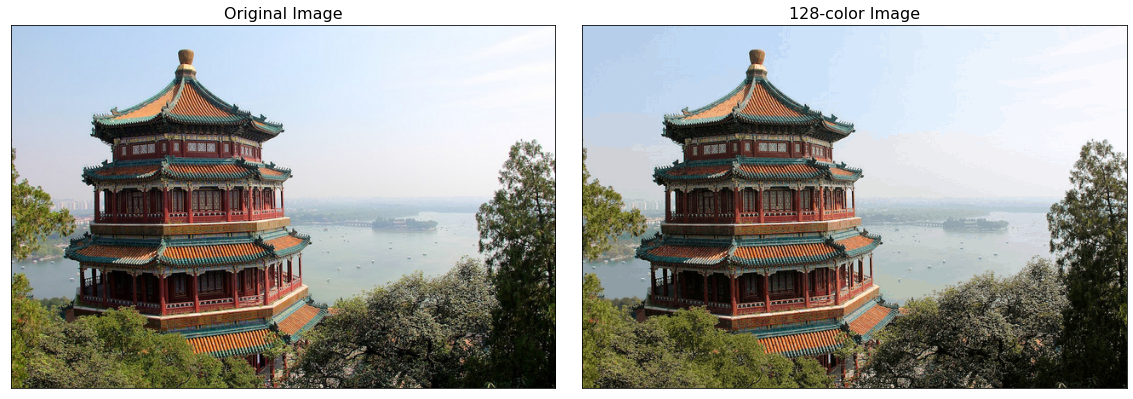

In [7]:
pic_recolored = new_colors.reshape(427, 640, 3)
title = str(N_CLUSTERS) + '-color Image'

fig, ax = plt.subplots(1, 2, figsize=(20, 8),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(pic)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(pic_recolored)
ax[1].set_title( title, size=16);

# Metrics

In [8]:
df = pd.read_csv('data/college.csv')
y = df['Private'].astype("category").cat.codes
X = df.drop(columns=['Unnamed: 0', 'Private'])
X.sample(5)

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
137   2994    1691     659         70         95         2675           22   
588   1154     951     253         15         31          791          140   
361    857     772     376         25         58         1721          470   
725   3315    1096     425         68         93         1584            3   
637  19152   12940    4893         66         92        22045         1339   

     Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
137     18000        6300    400       900   92        96       11.3   
588     11172        4958    700      1350   68        76       11.6   
361      6720        3250    450      1520   77        82       13.9   
725     13750        4619    680      1115   81        96        9.6   
637     15732        4659    476      1600   90        98       11.5   

     perc.alumni  Expend  Grad.Rate  
137           55   12138         95  
588           16    9186         60  
361           33    6881         82  
725           45   15736         90  
637           26   14847         87

## Model evaluation

In [9]:
X = preprocessing.normalize(X)

N_CLUSTERS = 2
kmeans = clu.KMeans(n_clusters=N_CLUSTERS, random_state=675).fit(X)
y_pred = kmeans.fit_predict(X)

# correct prediction labeling
#y_pred = pd.Series(y_pred).replace([0,1],[1,0])

# classification metrics
print(metrics.confusion_matrix(y, y_pred))
print(metrics.classification_report(y, y_pred))

# clustering metrics
print('FMI: %0.3f' % metrics.fowlkes_mallows_score(y, y_pred))
print('Homogeneity: %0.3f' % metrics.homogeneity_score(y, y_pred))
print('Completeness: %0.3f' % metrics.completeness_score(y, y_pred))
print('V-measure: %0.3f' % metrics.v_measure_score(y, y_pred))
print('Adjusted Rand Index: %0.3f' % metrics.adjusted_rand_score(y, y_pred))
print('Adjusted Mutual Information: %0.3f' % metrics.adjusted_mutual_info_score(y,  y_pred))
print('Silhouette Score:  %0.3f' % metrics.silhouette_score(X, y_pred)) # unknown ground truth
print('Davies-Bouldin:  %0.3f' % metrics.davies_bouldin_score(X, y_pred)) # unknown ground truth

[[ 57 155]
 [548  17]]
              precision    recall  f1-score   support

           0       0.09      0.27      0.14       212
           1       0.10      0.03      0.05       565

    accuracy                           0.10       777
   macro avg       0.10      0.15      0.09       777
weighted avg       0.10      0.10      0.07       777

FMI: 0.864
Homogeneity: 0.463
Completeness: 0.514
V-measure: 0.487
Adjusted Rand Index: 0.631
Adjusted Mutual Information: 0.487
Silhouette Score:  0.586
Davies-Bouldin:  0.704


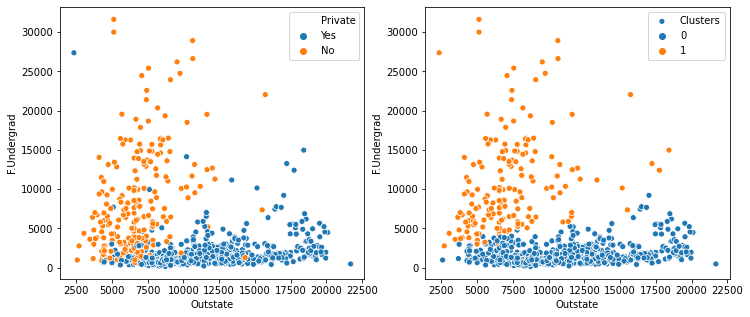

In [10]:
# Ground truth vs Predictions (N_CLUSTERS = 2)
# F.Undergrad and Outstate are the most correlated features (positively and negatively) with Private
fig, ax =plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(y=df['F.Undergrad'], x=df['Outstate'], hue=df.Private, ax=ax[0])
sns.scatterplot(y=df['F.Undergrad'], x=df['Outstate'], hue=y_pred, label='Clusters',ax=ax[1])
fig.show()

## Selecting the number of clusters (Silouette Analysis)

In [11]:
nclust = [2,3,4,5,6,7,8]

for n in nclust:
    kmeans = clu.KMeans(n_clusters=n, random_state=10).fit(X)
    y_pred = kmeans.fit_predict(X)
    print(f'clusters: {n}, Silhouette Score: {metrics.silhouette_score(X, y_pred):.3f}, FMI: {metrics.fowlkes_mallows_score(y, y_pred):.3f}')

# basicaly, there is most likely 2 clusters (probably private or not) 
# because the silouette score and FMI decline as the number of clusters grows

clusters: 2, Silhouette Score: 0.586, FMI: 0.864
clusters: 3, Silhouette Score: 0.406, FMI: 0.793
clusters: 4, Silhouette Score: 0.335, FMI: 0.715
clusters: 5, Silhouette Score: 0.307, FMI: 0.672
clusters: 6, Silhouette Score: 0.222, FMI: 0.556
clusters: 7, Silhouette Score: 0.223, FMI: 0.551
clusters: 8, Silhouette Score: 0.200, FMI: 0.471


For n_clusters = 2 The average silhouette_score is : 0.585803103928166
For n_clusters = 3 The average silhouette_score is : 0.40587943308735713
For n_clusters = 4 The average silhouette_score is : 0.3351384087651877
For n_clusters = 5 The average silhouette_score is : 0.3071217207300303
For n_clusters = 6 The average silhouette_score is : 0.22154358092806095


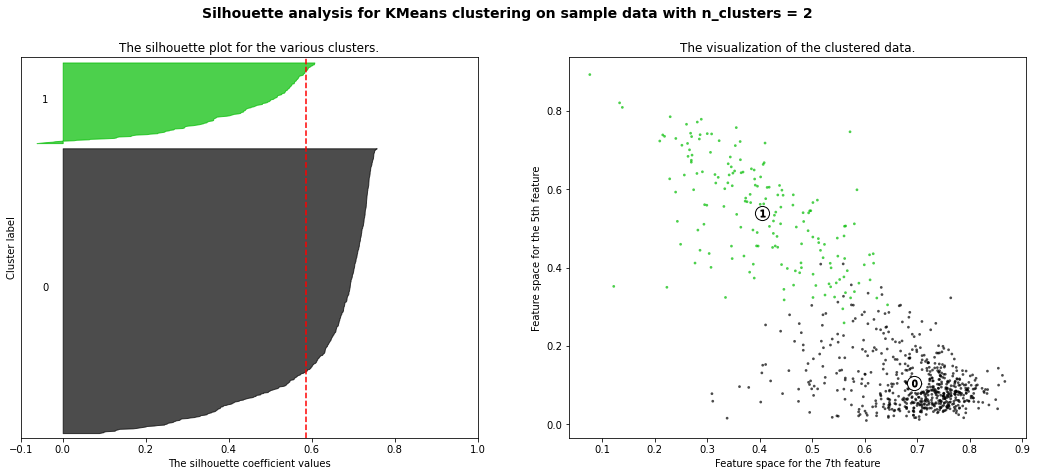

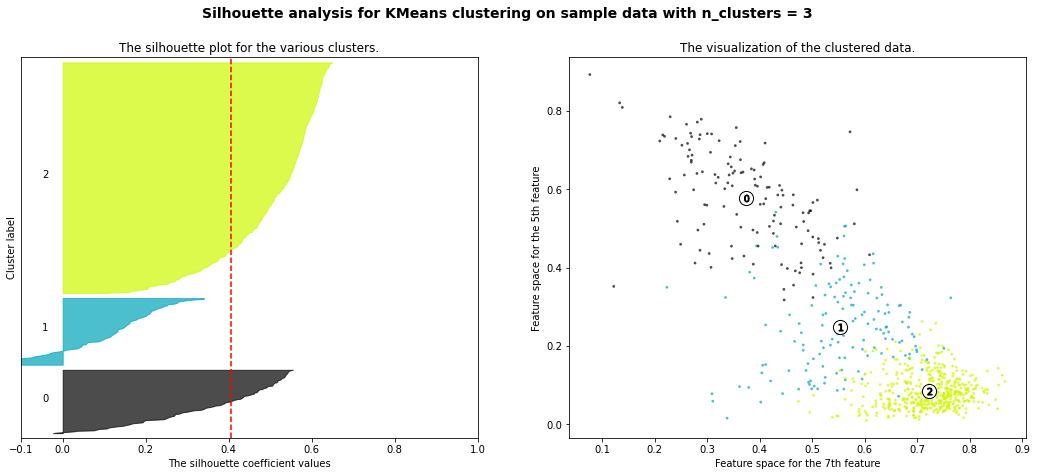

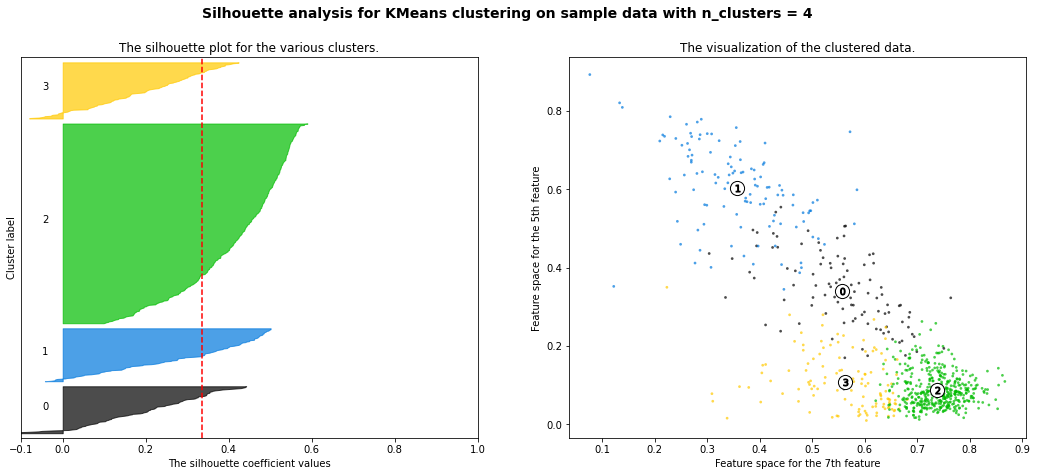

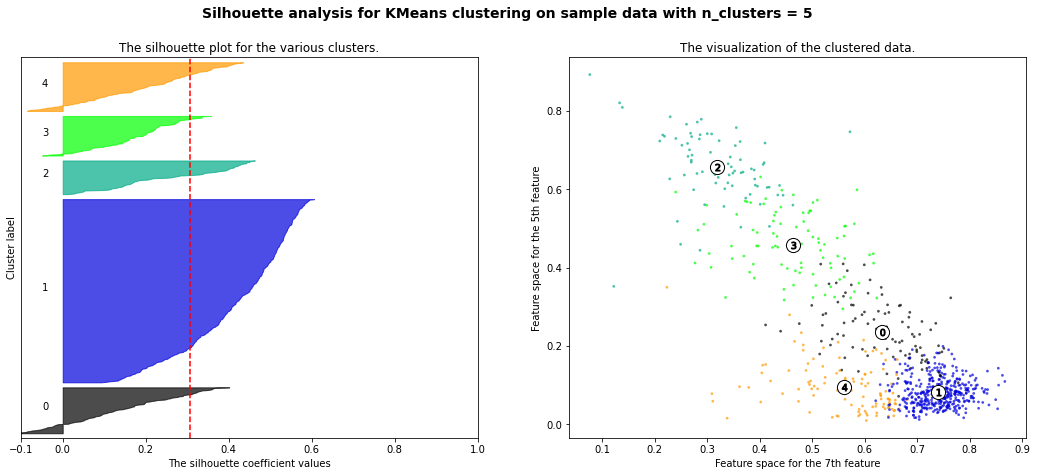

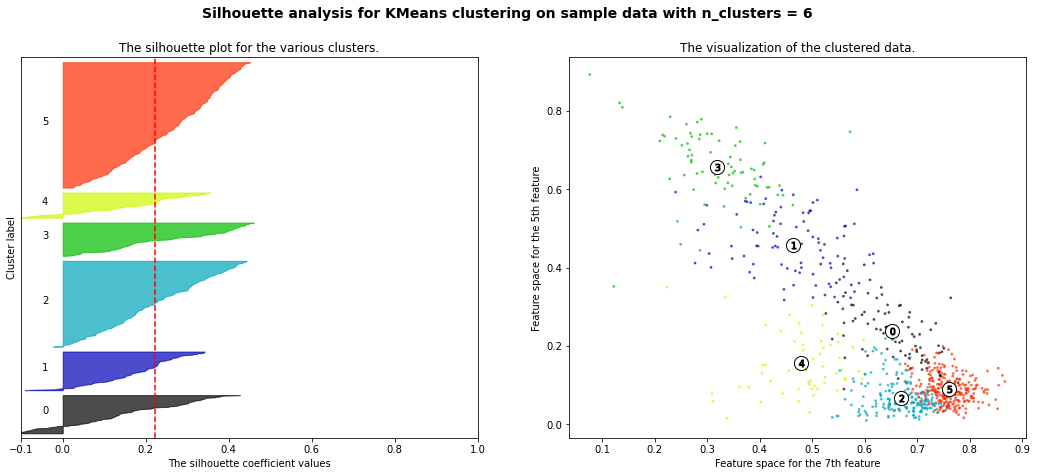

In [12]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = clu.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 7], X[:, 5], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 7], centers[:, 5], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[7], c[5], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 7th feature")
    ax2.set_ylabel("Feature space for the 5th feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()